### packages

In [74]:
import numpy as np

import matplotlib.pyplot as plt

from skopt.plots import plot_gaussian_process

from skopt import gp_minimize

import warnings

warnings.filterwarnings('ignore')

### parameters

In [75]:
########################################################################################################
########################################################################################################

num_interation=100


### algorithm

We are interested in solving

$$x^{*}= \arg \max_{x} f(x)$$

 
under the constraints that

- $f(x)$ is a black box for which no closed form is known (nor its gradients);

- $f(x)$ is expensive to evaluate;

- evaluations of $f(x)$ may be noisy.

To solve the minimization problem, we will construct a sequence of points $\{x_{n}\}$ that converge to $x^{*}$. Since we implicitly assume that we have a fixed budget (say 100 evaluations), we do not expect to find the exact minumum: the goal is to get the best approximate solution we can given the allocated budget.


### Bayesian optimization loop

For $t=1:N$:

- Given observations $(x_{i},y_{i}=f(x_{i}))$ for $i \in {1,...,N}$, build a probabilistic model for the objective 
. Integrate out all possible true functions, using Gaussian process regression.


- Optimize a cheap acquisition/utility function $u(x)$  based on the posterior distribution for sampling the next point. Exploit uncertainty to balance exploration against exploitation.


- Sample the next observation at $y_{t+1}$ and $x_{t}$.


### Acquisition function

A good acquisition function should make use of the uncertainty encoded in the posterior to encourage a balance between exploration—querying points where we know little about and exploitation—querying points in regions we have good reason to think $x$ may lie. 

As the iterative procedure progresses our model for evolves and so does the acquisition function. 

If our model is good and we’ve chosen a reasonable acquisition function, we expect that the acquisition function will guide the query points towards .

Acquisition functions $u(x)$ specify which sample $x$ should be tried next:

- Expected improvement (default)

- Lower confidence bound

- Probability of improvement


### Define an objective function

For the purposes of demonstration, the objective function we are going to consider is the Forrester et al. (2008) function:

$$f(x)=(6x-2)^{2}\sin(12x-4),x\in[0,1]$$

This function has both a local minimum and a global minimum. The global minimum is at $x^{*}=0.75725$.

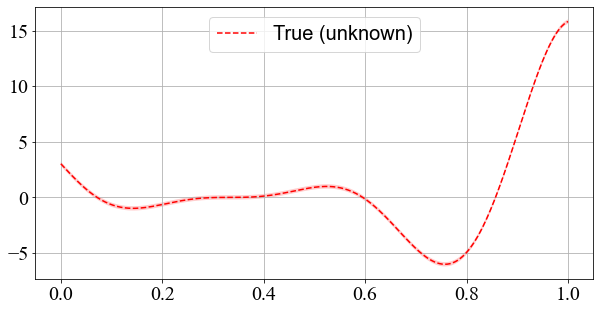

In [76]:
########################################################################################################
########################################################################################################
########################################################################################################
########################################################################################################

noise_level = 0.1

def f(x,noise_level=0.1):
    
    return (6 * x[0] - 2)**2 * np.sin(12 * x[0] - 4)+ np.random.randn() * noise_level

def f_wo_noise(x):
    
    return f(x, noise_level=0)

########################################################################################################
########################################################################################################

font_legend = {'family' : 'Arial','weight' : 'normal','size': 20}

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 25}

fig, axs = plt.subplots(figsize = (10,5))

labels = axs.get_xticklabels() + axs.get_yticklabels()

[label.set_fontsize(20) for label in labels]

[label.set_fontname('Times New Roman') for label in labels]

axs.grid()

########################################################################################################
########################################################################################################

x = np.linspace(0, 1, 400).reshape(-1, 1)

fx = [f_wo_noise(x_i) for x_i in x]

axs.plot(x, fx, "r--", label="True (unknown)")

axs.fill(np.concatenate([x, x[::-1]]),np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx],[fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),alpha=.2, fc="r", ec="None")

axs.legend(loc='upper center', prop=font_legend)


plt.show()

### Bayesian optimization

array([  1,  25,  50,  75, 100])

x^*=0.7655, f(x^*)=-6.2682


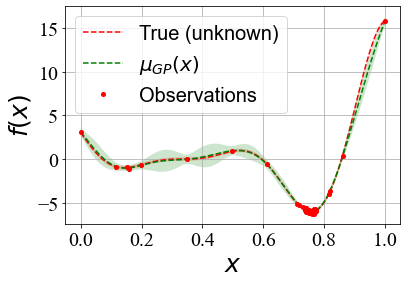

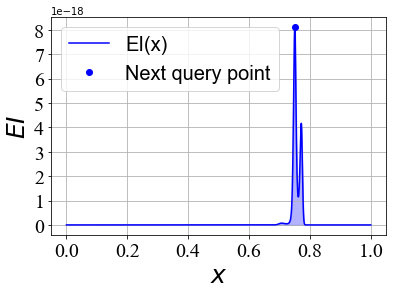

In [100]:
########################################################################################################
########################################################################################################
########################################################################################################
########################################################################################################


res = gp_minimize(f,                  # the function to minimize
                  [(0.0, 1.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=num_interation,         # the number of evaluations of f
                  n_random_starts=10,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  random_state=1234)   # the random seed

print("x^*=%.4f, f(x^*)=%.4f" % (res.x[0], res.fun))

########################################################################################################
########################################################################################################


plt.rcParams["figure.figsize"] = (6, 4)

axs = plot_gaussian_process(res, objective=f_wo_noise,show_legend=True,show_title=False,
                          noise_level=noise_level)

labels = axs.get_xticklabels() + axs.get_yticklabels()

[label.set_fontsize(20) for label in labels]

[label.set_fontname('Times New Roman') for label in labels]

axs.set_xlabel('$x$',font_label)

axs.set_ylabel('$f(x)$',font_label)

axs.legend(loc='best', prop=font_legend)

plt.show()

########################################################################################################
########################################################################################################


plt.rcParams["figure.figsize"] = (6, 4)

axs = plot_gaussian_process(res, show_legend=True,\
                          show_title=False,show_mu=False,\
                          show_acq_func=True,show_observations=False,\
                          show_next_point=True)

labels = axs.get_xticklabels() + axs.get_yticklabels()

[label.set_fontsize(20) for label in labels]

[label.set_fontname('Times New Roman') for label in labels]

axs.set_xlabel('$x$',font_label)

axs.set_ylabel('$EI$',font_label)

axs.legend(loc='best', prop=font_legend)

plt.show()

